In [98]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [99]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [100]:
import pandas as pd

In [101]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/twitter1.csv', encoding='latin-1', header=0)
rng = RandomState()
#df.drop(['Cleanedreview'],axis=1,inplace=True)
#df.to_csv('mr/sst5.csv', index=False)
train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-1twitter.csv', index=False)
test.to_csv('mr/test-1twitter.csv', index=False)

In [102]:
train_df = pd.read_csv("mr/train-1twitter.csv", encoding='latin-1', header=0)

In [103]:
train_df

,review,sentiment
0,I personally saw CatsMovie the next day becaus...,0
1,ITChapterTwo cause of how shitty it was,1
2,I saw it today. I was really impressed with th...,2
3,UsMovie Spoilers So I just saw it for the seco...,0
4,Alita: Battle Angel deserves the profit that C...,2
...,...,...
26996,Certainly not surprised......but ugh. DarkPhoe...,0
26997,I want to go see UsMovie again,0
26998,Everyone on Oct 31st be like JokerMovie,2
26999,This shot is so clean. avengersendgame,1


In [104]:
train_df.iloc[0][1]

0

In [105]:
test_df = pd.read_csv("mr/test-1twitter.csv", encoding='latin-1', header=0)

In [106]:
test_df.shape

(3000, 2)

In [107]:
test_df.head()

,review,sentiment
0,New episode alert! We have a special guest thi...,2
1,I hated rabbits before UsMovie and now I want ...,0
2,Joker has past $450 Million world wide! This m...,1
3,Â¿Has visto DarkPhoenix?,0
4,I won a 3D printed model of the captainmarvel ...,1


In [108]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,review,sentiment
0,I personally saw CatsMovie the next day becaus...,0
1,ITChapterTwo cause of how shitty it was,1
2,I saw it today. I was really impressed with th...,2
3,UsMovie Spoilers So I just saw it for the seco...,0
4,Alita: Battle Angel deserves the profit that C...,2
5,The reason DarkPhoenix was pushed back from Fe...,0
6,This week Jason Robbins from HelptheMonsters a...,2
7,The plot twist at the end I knew Adelaide was ...,0
8,WTF did I just watch bro!? JokerMovie,1
9,OnceUponATimeInHollywood rising star Julia But...,2


In [109]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,I personally saw CatsMovie the next day becaus...
1,1,1,ITChapterTwo cause of how shitty it was
2,2,2,I saw it today. I was really impressed with th...
3,3,0,UsMovie Spoilers So I just saw it for the seco...
4,4,2,Alita: Battle Angel deserves the profit that C...


In [110]:
train_df_bert = train_df_bert.iloc[0:10000]

In [111]:
train_df_bert

,id,label,sentence
0,0,0,I personally saw CatsMovie the next day becaus...
1,1,1,ITChapterTwo cause of how shitty it was
2,2,2,I saw it today. I was really impressed with th...
3,3,0,UsMovie Spoilers So I just saw it for the seco...
4,4,2,Alita: Battle Angel deserves the profit that C...
...,...,...,...
9995,9995,1,endgame was cute (beautiful gowns) it wasn't a...
9996,9996,1,"""Make it gay you COWARDS!"" ok this video is ev..."
9997,9997,0,I left DarkPhoenix last night feeling upset an...
9998,9998,0,Because why wouldn't I listen to the soundtrac...


In [112]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,2,New episode alert! We have a special guest thi...
1,1,0,I hated rabbits before UsMovie and now I want ...
2,2,1,Joker has past $450 Million world wide! This m...
3,3,0,Â¿Has visto DarkPhoenix?
4,4,1,I won a 3D printed model of the captainmarvel ...


In [113]:
test_df_bert = test_df_bert.iloc[0:3000]

In [114]:
test_df_bert

,id,label,sentence
0,0,2,New episode alert! We have a special guest thi...
1,1,0,I hated rabbits before UsMovie and now I want ...
2,2,1,Joker has past $450 Million world wide! This m...
3,3,0,Â¿Has visto DarkPhoenix?
4,4,1,I won a 3D printed model of the captainmarvel ...
...,...,...,...
2995,2995,1,Star Dude I am in a silly mood these days. chr...
2996,2996,2,Would you classify jokermovie as a horror film...
2997,2997,2,Date night tonight! Dinner and then seeing Onc...
2998,2998,2,If you like great performances beautiful visua...


In [115]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [116]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [117]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [118]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  ITChapterTwo cause of how shitty it was 
Tokenized:  ['it', '##cha', '##pt', '##ert', '##wo', 'cause', 'of', 'how', 'shitty', 'it', 'was']
Token IDs:  [2009, 7507, 13876, 8743, 12155, 3426, 1997, 2129, 28543, 2009, 2001]


In [119]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  149


In [120]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  132


In [121]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  I personally saw CatsMovie the next day because of my feelings towards TheRiseOfSkywalker but y'know to each their own
Token IDs: tensor([  101,  1045,  7714,  2387,  8870,  5302, 13469,  1996,  2279,  2154,
         2138,  1997,  2026,  5346,  2875,  1996, 29346, 11253,  5874, 26965,
         2021,  1061,  1005,  2113,  2000,  2169,  2037,  2219,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [122]:

train_df_bert.head()

,id,label,sentence
0,0,0,I personally saw CatsMovie the next day becaus...
1,1,1,ITChapterTwo cause of how shitty it was
2,2,2,I saw it today. I was really impressed with th...
3,3,0,UsMovie Spoilers So I just saw it for the seco...
4,4,2,Alita: Battle Angel deserves the profit that C...


In [123]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [124]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [125]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (3000, 60)


In [135]:
#FuzzyCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt


# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))

model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
dropout_35 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
dropout_36 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
dropout_37 (Dropout)         (None, 60,

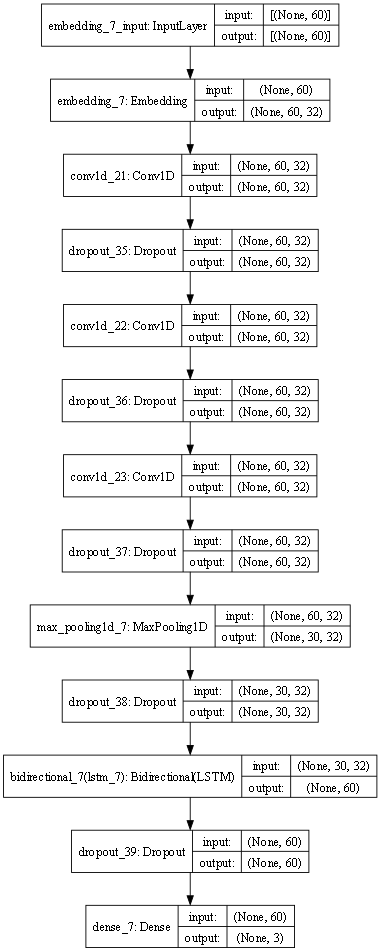

In [136]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [137]:
import keras
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 14s 12ms/step - loss: 0.6237 - accuracy: 0.6643 - val_loss: 0.4366 - val_accuracy: 0.7920
Epoch 2/20
900/900 [==============================] - 10s 12ms/step - loss: 0.3303 - accuracy: 0.8507 - val_loss: 0.3360 - val_accuracy: 0.8520
Epoch 3/20
900/900 [==============================] - 10s 11ms/step - loss: 0.2402 - accuracy: 0.8982 - val_loss: 0.3370 - val_accuracy: 0.8660
Epoch 4/20
900/900 [==============================] - 10s 11ms/step - loss: 0.1850 - accuracy: 0.9223 - val_loss: 0.3441 - val_accuracy: 0.8590
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.1111 - accuracy: 0.9610
Training Accuracy: 0.961000
Training Loss: 0.111138
94/94 [==============================] - 1s 5ms/step - loss: 0.3988 - accuracy: 0.8510
Testing Accuracy:  0.851000
Testing Loss:  0.398778


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()